In [72]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [73]:
df = pd.read_csv('lif_start//SignalDoubleChangeResponses.csv', header=None)

In [77]:
set(df[2])

{' dTrace', ' dV'}

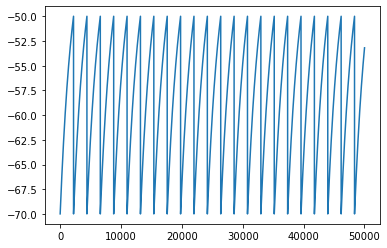

In [78]:
plt.plot(np.cumsum(df[3][df[2] == ' dV']) - 70.0)

(-1.0, 2.0)

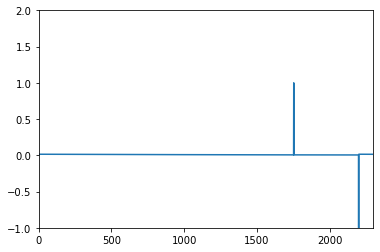

In [67]:
plt.plot(df[3])
plt.xlim([0,2300])
plt.ylim([-1,2])

In [143]:
spike_matrix_binned = np.zeros((len(set(df[1])), 500))

spike_times = list()
for cell_idx, (cell_hash, cell_group) in enumerate(df.groupby(1)):
    cell_spike_times = sorted(cell_group[0])
    spike_times.append(cell_spike_times)
    
    spike_matrix_binned[cell_idx] = np.histogram(cell_spike_times, bins=np.arange(0,501000, 1000))[0]

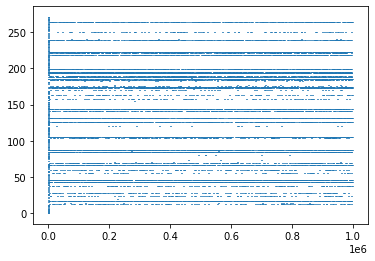

In [144]:
_ = plt.eventplot(spike_times)
# plt.xlim([0,100000])

In [145]:
act_pca = PCA().fit_transform(spike_matrix_binned.T)

In [146]:
import numpy_groupies as npg
from sklearn.decomposition import PCA

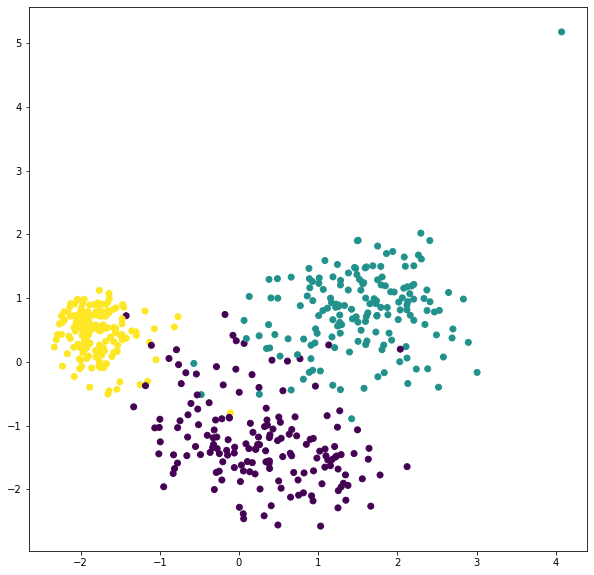

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(act_pca[:, 0], act_pca[:, 1], c=([0,1, 2]*200)[:500])

In [48]:
from sklearn.manifold import TSNE

In [55]:
weights1to2 = np.fromfile('excInhib//synapse1to2_weights.txt', sep='\n').reshape(100,256)
# weights2to3 = np.fromfile('excInhib//synapse2to3_weights.txt', sep='\n').reshape(169, 25)

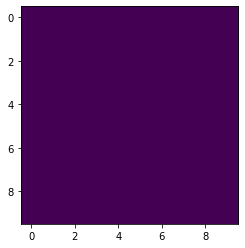

In [56]:
plt.imshow(weights1to2_fixed[0].reshape(10,10))

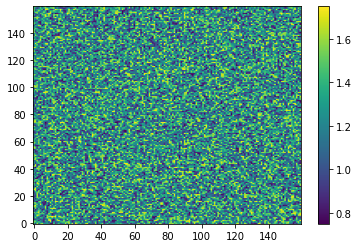

In [57]:
plt.imshow(get_2d_input_weights(weights1to2), origin='lower', aspect='auto')
plt.colorbar()

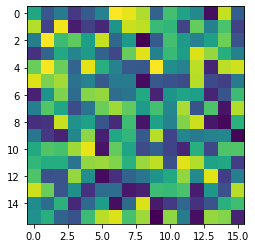

In [58]:
plt.imshow(weights1to2[6].reshape(16,16))

In [44]:
weights1to2.reshape(-1,16,16).shape

(100, 16, 16)

In [45]:
160*160

25600

In [46]:
def get_2d_input_weights(weight_matrix, sz=16):
    image_huge = np.zeros((160,160))
        
    for i in range(weight_matrix.shape[0]):
        row = i % 10
        col = i // 10
        
        image_huge[row*16:(row+1)*16, col*16:(col+1)*16] = weight_matrix[i].reshape(16,16)
    return image_huge

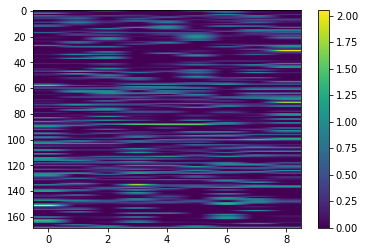

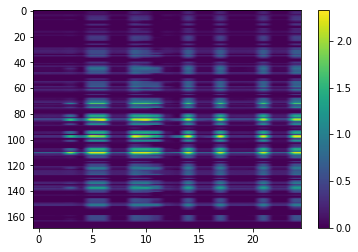

In [17]:
plt.imshow(weights2to3, aspect='auto')
plt.colorbar()

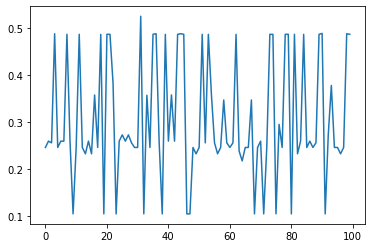

In [90]:
plt.plot(weights2to3[:, 5])

In [131]:
vals = [1]
for _ in range(100):
    vals.append(vals[~0]*0.9)

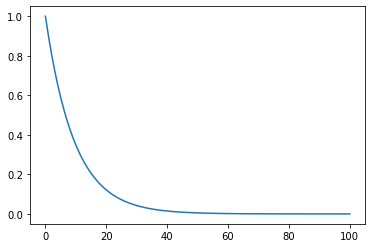

In [132]:
plt.plot(vals)

In [5]:
np.arange(1, 28, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])